In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
#create dataframes from csv files

peptides = pd.read_csv("PD-datasets/train_peptides.csv")
proteins = pd.read_csv("PD-datasets/train_proteins.csv")
clinical = pd.read_csv("PD-datasets/train_clinical_data.csv")

# EDA

To begin our data exploration we will look at the example of one patient in all 3 datasets. First, let's track the progression of the patient's disease as measured by Unified Parkinson's Disease Rating Scale (UPDRS). The UPDRS is composed of 4 parts, which measure the different impacts of the disease on a patient's health. 

In [169]:
patients = clinical.patient_id.unique()
r = random.choice(patients)
patient_x = clinical.loc[clinical['patient_id']==r,:]

Text(0.5, 1.0, 'Patient 59574 UPDRS Over Time')

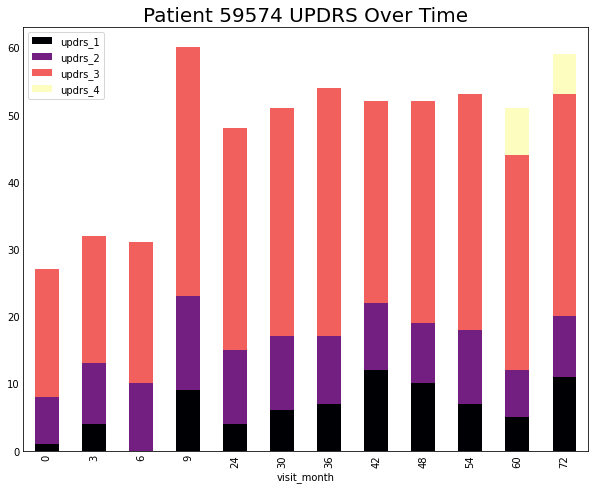

In [170]:
ax = patient_x[["visit_month","updrs_1","updrs_2","updrs_3","updrs_4"]].plot.bar(x='visit_month', 
                                                                                 stacked=True, 
                                                                                 figsize=(8,6),
                                                                                 cmap='magma')
ax.set_title(f'Patient {r} UPDRS Over Time', fontsize=20)

We have two other datasets that provide context to the patients' disease progression. In addition to the UPDRS, protein measurements were taken at every visit. 

Our protein dataset tells us which proteins are present, and in what concentration (NPX).

The peptides dataset tells us what those proteins are composed of.

In [171]:
proteins_x = proteins.loc[proteins['patient_id']==r,:]
peptides_x = peptides.loc[peptides['patient_id']==r,:]

In [173]:
visits = patient_x.visit_id.unique()
v = random.choice(visits)

In [174]:
visit_x_proteins = proteins_x.loc[proteins_x['visit_id']==v,:]
visit_x_peptides = peptides_x.loc[peptides_x['visit_id']==v,:]

Text(0.5, 1.0, 'Patient 59574 Proteins at Visit 59574_24')

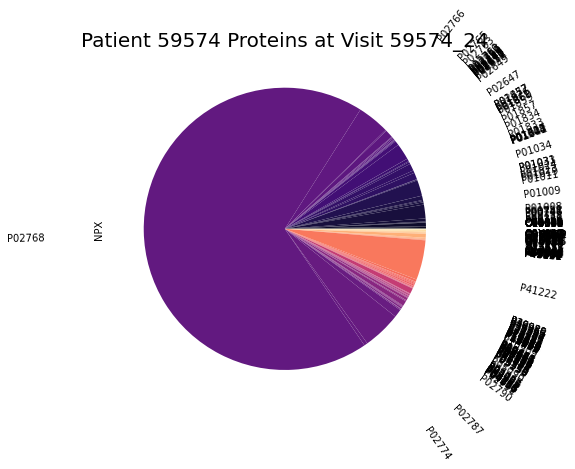

In [175]:
protein_labels = visit_x_proteins["UniProt"]
proteins_plot = visit_x_proteins.plot.pie(y='NPX', 
                                          figsize=(5, 5), 
                                          labels=protein_labels,
                                          legend=None,
                                          rotatelabels = True,
                                          labeldistance=1.7,
                                          cmap='magma')
proteins_plot.set_title(f'Patient {r} Proteins at Visit {v}', fontsize=20)

Text(0.5, 1.0, 'Patient 59574 Peptides at Visit 59574_24')

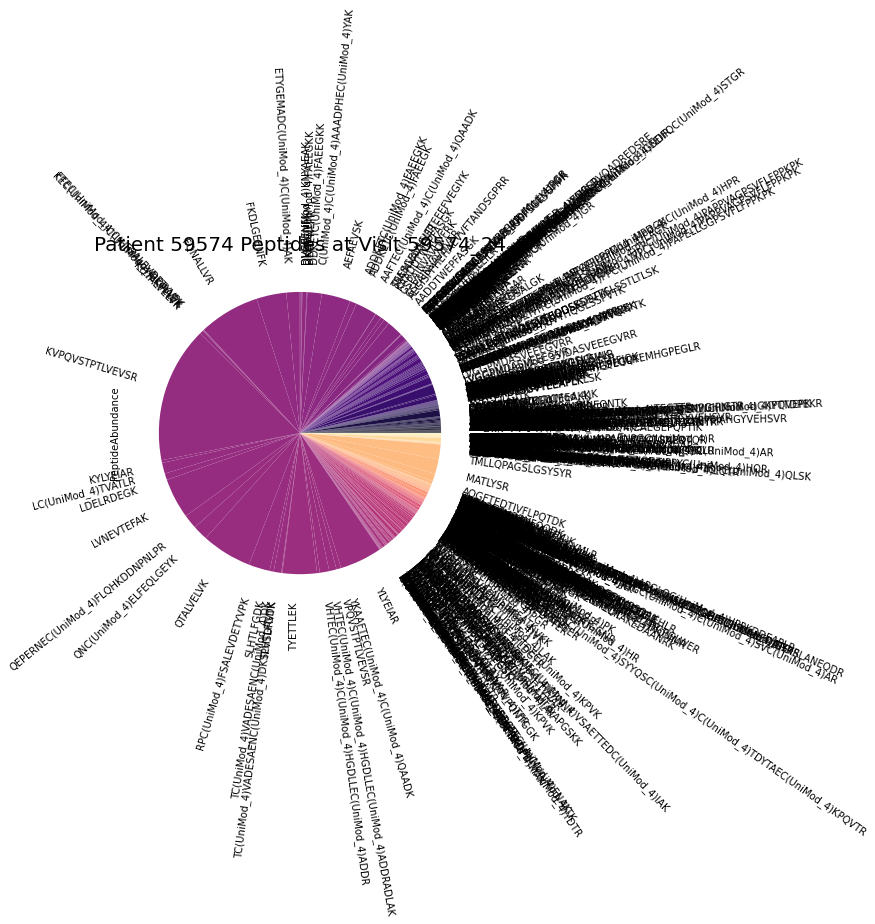

In [180]:
peptide_labels = visit_x_peptides["Peptide"]
peptides_plot = visit_x_peptides["PeptideAbundance"].plot.pie(figsize=(5, 5), 
                                          labels=peptide_labels, 
                                          legend=None,
                                          rotatelabels=True,
                                          labeldistance= 1.2,
                                          cmap='magma')
peptides_plot.set_title(f'Patient {r} Peptides at Visit {v}', fontsize=20)

# Conclusions 

This is a very complex dataset, with hundreds of proteins and peptides which combine in many different ways. As next steps, we will use machine learning to try to tease out which of these are the most important.